In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.weightstats import ztest as ztest
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats.stats import pearsonr
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import preprocessing
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

C:\Users\Admin\AppData\Local\Temp\ipykernel_21004\1652345168.py:10: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


In [83]:
df = pd.read_excel("data/sales_data_sample.xlsx")

### Mô tả dữ liệu công ty bán hàng đa quốc gia ABC
* ORDERNUMBER: Mã hóa đơn
* QUANTITYORDERED: Số lượng sản phẩm đặt hàng
* ORDERLINENUMBER: Dòng thông tin mua sản phẩm trên hóa đơn, trên hóa đơn có thể có nhiều dòng thông tin mua các sản phẩm khác nhau
* SALES: Giá trị đặt hàng
* ORDERDATE: Ngày đặt hàng
* STATUS: Trạng thái cho biết tình trạng giao hàng
* COUNTRY: Địa điểm đặt hàng
* DEALSIZE: Phân loại kích thước đặt hàng
* Discount: Giảm giá (%)
* Profit: Lợi nhuận


In [84]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,COUNTRY,DEALSIZE,Discount,Profit
0,10107,30,2,2871.00,2003-02-24,Shipped,USA,Small,0.00,41.9136
1,10121,34,5,2765.90,2003-05-07,Shipped,France,Small,0.00,219.5820
2,10134,41,2,3884.34,2003-07-01,Shipped,France,Medium,0.00,6.8714
3,10145,45,6,3746.70,2003-08-25,Shipped,USA,Medium,0.45,-383.0310
4,10159,49,14,5205.27,2003-10-10,Shipped,USA,Medium,0.20,2.5164


**Câu 1: Dựa vào mô hình hồi quy tuyến tính được sử dụng để phân tích sự ảnh hưởng của số lượng mua hàng, giá trị bán hàng và giảm giá tác động như thế nào đến lợi nhuận. Hãy cho biết thứ tự mức độ tác động từ cao đến thấp của các biến độc lập đối với biến phụ thuộc:**

a. Discount, QUANTITYORDERED, SALES

b. QUANTITYORDERED, Discount, SALES

c. QUANTITYORDERED, SALES, Discount

d. Discount, SALES, QUANTITYORDERED

e. SALES, Discount, QUANTITYORDERED


In [85]:
X_with_constant = sm.add_constant(df[["QUANTITYORDERED", "SALES", "Discount"]].values)
y = df[['Profit']].values
result = sm.OLS(y, X_with_constant).fit()
print(result.summary())

# |coef| QUANTITYORDERED là 0.3367
# |coef| SALES là 0.0013
# |coef| Discount là 238.6262

# Vậy sắp xếp từ lớn đến nhỏ theo mức tác động là:
# Discount, QUANTITYORDERED, SALES

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     64.21
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           3.74e-40
Time:                        19:17:50   Log-Likelihood:                -18760.
No. Observations:                2823   AIC:                         3.753e+04
Df Residuals:                    2819   BIC:                         3.755e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.7781     13.377      4.095      0.0

**Câu 2: Hãy cho biết thứ tự mức độ ổn định tăng dần của giá trị bán hàng trên từng nhóm kích thước đặt hàng:**

A. Small, Large, Medium

B. Large, Medium, Small

C. Large, Small, Medium

D. Small, Medium, Large

E. Medium, Small, Large


In [86]:
df.groupby('DEALSIZE')['SALES'].std()

# Khi hỏi mức độ ổn định tăng dần là mức độ
# phân tán giảm dần

# Large     1294.739895
# Medium    1047.090148
# Small      577.183322

# Vậy sắp xếp theo tăng dần mức độ ổn định
# sẽ là Large, Medium, Small

DEALSIZE
Large     1294.739895
Medium    1047.090148
Small      577.183322
Name: SALES, dtype: float64

**Câu 3: Hãy cho biết dựa vào biểu đồ boxplot về doanh số trên từng nhóm kích thước đặt hàng, nếu có dữ liệu thiếu trên nhóm DEALSIZE = Medium thì dữ liệu thiếu đó nên được thay thế bằng:**

a. Trung bình SALES của nhóm Large
b. Trung bình SALES của nhóm Small

c. Trung bình giá trị SALES của nhóm Small và Medium

d. Trung bình giá trị SALES của nhóm Small và Medium

e. Trung bình SALES của nhóm Medium

f. Trung của giá trị SALES

g. Trung bình giá trị SALES của nhóm Large và Medium


Trung bình SALES của nhóm Medium

Khi có dữ liệu thiếu trên một nhóm (DEALSIZE = Medium), thông thường, việc thay thế dữ liệu thiếu bằng trung bình của chính nhóm đó là lựa chọn hợp lý để đảm bảo tính đại diện của dữ liệu.


**Câu 4: Hãy cho biết trung bình doanh số ở trạng thái giao hàng là "hold on" có màu gì?**

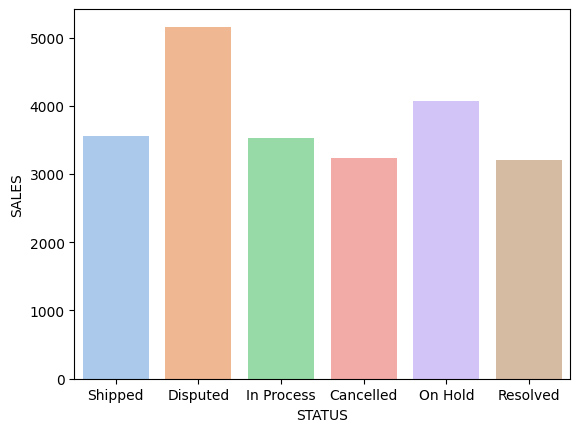

a. Xanh lá cây

b. Nâu

c. Cam

d. Đỏ

e. Tím

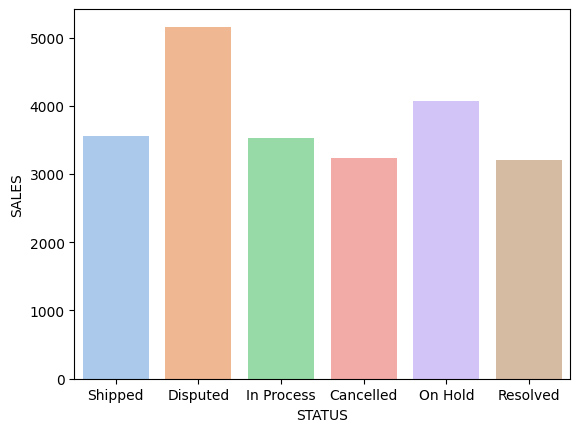

In [87]:
sns.barplot(x='STATUS', y='SALES', hue="STATUS", data=df, errorbar=None, palette='pastel')
plt.show()

# Màu tím

**Câu 5: Phần delimiter để phân cách dữ liệu trong file là gì**

a. Apostrophe

b. Hyphen

c. Comma

d. None

e. Colon

f. Period

g. Semicolon

Comma, Semicolon

**Câu 6 Dựa vào biểu đồ Scatter hãy cho biết sự tương quan của biến X và biến Y theo thứ tự các hình 1 2 3**

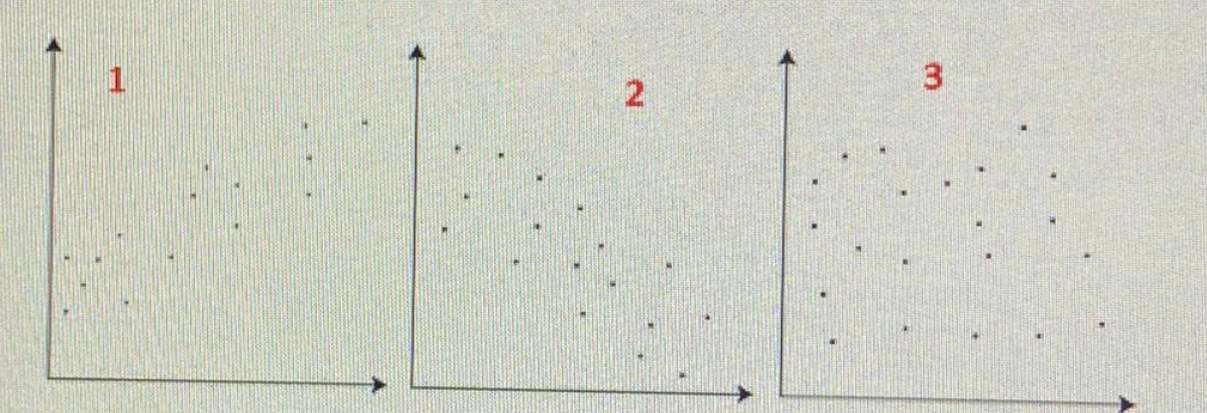

a. Thuận, không, nghịch

b. Nghịch, thuận, không

c. Thuận, nghịch, không

d. Không, thuận, nghịch

e. Không, nghịch, thuận

Hình 1: Tương quan thuận (giá trị X tăng, Y cũng tăng).

Hình 2: Tương quan nghịch (giá trị X tăng, Y giảm).

Hình 3: Không có tương quan rõ ràng (X tăng hoặc giảm không ảnh hưởng đến Y).

Vậy đáp án là thuận, nghịch, không

**Câu 7: Dựa vào mô hình hồi quy tuyến tính được sử dụng để phân tích sự ảnh hưởng của số lượng mua hàng, giá trị bán hàng và giảm giá tác động như thế nào đến lợi nhuận. Hãy cho biết mô hình có ý nghĩa thống kê hay không.**

A. Đúng

B. Sai

In [88]:
X_with_constant = sm.add_constant(df[["QUANTITYORDERED", "SALES", "Discount"]].values)
y = df[['Profit']].values
result = sm.OLS(y, X_with_constant).fit()
print(result.summary())

# Prob (F-statistic) < 0.05 
# Vậy mô hình có ý nghĩa thống kê

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     64.21
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           3.74e-40
Time:                        19:17:50   Log-Likelihood:                -18760.
No. Observations:                2823   AIC:                         3.753e+04
Df Residuals:                    2819   BIC:                         3.755e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.7781     13.377      4.095      0.0

**Câu 8: Có mối liên hệ nào giữa trạng thái giao hàng và giá trị đặt hàng hay không?**

a. Có phụ thuộc

b. Không phụ thuộc


In [89]:
model = ols('SALES ~ STATUS', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=1)
aov_table

# PR(>F) = 0.003661 < 0.05 
# REJECT H0 => Đủ dữ kiện để bắt bỏ Status không phụ thuộc
# vào Sales
# Hay: Status có phụ thuộc vào Sales

,df,sum_sq,mean_sq,F,PR(>F)
STATUS,5.0,5.921801e+07,1.184360e+07,3.506652,0.003661
Residual,2817.0,9.514324e+09,3.377467e+06,NaN,NaN


**Câu 9: Dựa vào mô hình hồi quy tuyến tính được sử dụng để phân tích sự ảnh hưởng của số lượng mua hàng, giá trị bán hàng và giảm giá tác động như thế nào đến lợi nhuận. Hãy dự báo giá trị lợi nhuận khi biết lần lượt tương ứng các biến độc lập là 50, 2000, 0.01.**

a. 66.826838

b. 67.626838

c. 66.726838

d. 66.626838

e. 66.926838

In [90]:
X_with_constant = sm.add_constant(df[["QUANTITYORDERED", "SALES", "Discount"]].values)
y = df[['Profit']].values
result = sm.OLS(y, X_with_constant).fit()
print(result.summary())

print(54.7781 + 0.3367 * 50 + -0.0013 * 2000 + -238.6262 * 0.01)
# 66.626838

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     64.21
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           3.74e-40
Time:                        19:17:50   Log-Likelihood:                -18760.
No. Observations:                2823   AIC:                         3.753e+04
Df Residuals:                    2819   BIC:                         3.755e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.7781     13.377      4.095      0.0

**Câu 10: Nếu sử dụng One Hot Encoding để số hóa dữ liệu DEALSIZE thì kết quả của dòng cuối cùng là bao nhiêu?**

a. [0.0 0.0]

b. [0.1 0.0]

c. [0.1 1.1]

d. [1.0 0.0]

e. [0.0 1.1]

In [91]:
y = OneHotEncoder().fit_transform(df[['DEALSIZE']]).toarray()
print("\nSử dụng OneHotEncoder để vector hóa:")
print(y)


Sử dụng OneHotEncoder để vector hóa:
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


**Câu 11: Hãy cho biết biến DEALSIZE thuộc thang đo nào?**

a. Tỉ lệ

b. Định tính

c. Phân loại

d. Khoảng

e. Định danh

f. Định lượng

DEALSIZE thuộc thang đo phân loại

**Câu 12: Biểu đồ nào phù hợp cho biến định tính?**

a. Histogram

b. Pie chart

c. Scatter plot

e. Bar chart

f. Line chart

g. Box and whisker plot

h. Stem and leaf plot

**Định tính**: Pie chart và Bar chart 
**Định lượng**: Histogram, Scatter plot, Line chart, Box and whisker plot, Stem and leaf plot

**Câu 13: Hãy cho biết tương quan mẫu của QUANTITYORDERED và SALES.**

a. Tương quan yếu

b. Tương quan hoàn hảo

c. Tương quan

d. Tương quan rất tốt

e. Tương quan nghịch

f. Không tương quan

g. Tương quan thuận

In [92]:
df[["QUANTITYORDERED", "SALES"]].corr()

# tương quan thuận, tương quan rất tốt.

,QUANTITYORDERED,SALES
QUANTITYORDERED,1.000000,0.551426
SALES,0.551426,1.000000


**Câu 14: Cho biết giá trị của SALES sau khi dùng chuẩn hóa Z-Score Scaler là 0.25, hỏi giá trị trước chuẩn hóa là bao nhiêu.**

a. 4014.97378493

b. 4014.27378493

c. 5014.27378493

d. 404.27378493

e. 4015.27378493

In [93]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df[['SALES']])
scaled_df = pd.DataFrame(scaled, columns=df[['SALES']].columns)

scaler.inverse_transform([[0.25]])

# 4014.27378493

array([[4014.27378493]])

**Câu 15: Hãy cho biết có bao nhiêu quốc gia đặt hàng tại công ty ABC?**

a. 17

b. 21

c. 20

d. 19

e. 18

In [94]:
len(list(df["COUNTRY"].value_counts().index))

19

**Câu 16: Hãy cho biết mức độ lệch của SALES sau khi được transform qua hàm log?**

a. Lệch nhiều hơn ban đầu

b. Lệch ngược chiều với ban đầu

c. Lệch cùng chiều với ban đầu

d. Lệch ít hơn ban đầu

e. Lệch bằng với ban đầu

f. Không lệch, tức độ lệch = 0

In [99]:
df["newSales"] =  np.log(df["SALES"])

df[["SALES", "newSales"]].skew()

# SALES       1.161076
# newSales   -0.202174

# Lệch ngược chiều với ban đầu, lệch ít hơn ban đầu

SALES       1.161076
newSales   -0.202174
dtype: float64

**Câu 17: Hãy cho biết độ lệch của giá trị đặt hàng của các sản phẩm?**

a. 1.161076000881289

b. 1.361076000881289

c. 1.261076000881289

d. 1.461076000881289

e. 1.191076000881289

In [100]:
df["SALES"].skew()
# 1.161076000881289

np.float64(1.161076000881289)

**Câu 18: Hãy cho biết trong đơn hàng số dòng đặt hàng nhiều nhất là bao nhiêu?**

a. 18

b. 21

c. 22

d. 19

e. 20

In [101]:
df["ORDERNUMBER"].value_counts()
# 18

ORDERNUMBER
10386    18
10398    18
10222    18
10106    18
10159    18
         ..
10286     1
10158     1
10345     1
10118     1
10294     1
Name: count, Length: 307, dtype: int64

**Câu 19: Nếu sử dụng Min-Max Scaler cho SALES thì giá trị có index từ 50 đến 59 được scale thành bao nhiêu?**

a. 0.571492 0.142230 0.268965 0.846934 0.251044 0.169972 0.207757 0.346367 0.333417 0.233724

b. 0.571492 0.142230 0.268965 0.846934 0.251044 0.169972 0.207757 0.346367 0.333417 0.233724

c. 0.571492 0.142230 0.268965 0.846934 0.251044 0.169972 0.207757 0.346367 0.333417 0.233724

d. 0.571492 0.142230 0.268965 0.846934 0.251044 0.169972 0.207757 0.346367 0.333417 0.233724

e. 1.571492 0.142230 0.268965 0.846934 0.251044 0.169972 0.207757 0.346367 0.333417 0.233724

In [106]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[['SALES']])
scaled_df = pd.DataFrame(scaled, columns=df[['SALES']].columns).iloc[50:60]
scaled_df

# 0.571492 0.142230 0.268965 0.846934 0.251044 0.169972 0.207757 0.346367 0.333417 0.233724

,SALES
50,0.571492
51,0.142230
52,0.268965
53,0.846934
54,0.251044
55,0.169972
56,0.207757
57,0.346367
58,0.333417
59,0.233724


**Câu 20: Hãy giá trị lệch của SALES sau khi được transform qua hàm f(x) = 1/(log(x)^2 - 1)?**

a. 1.7679976616615047

b. 0.7679976616615047

c. 2.7679976616615047

d. 1.8679976616615047

e. 0.8679976616615047

In [104]:
df["newSales"] =  1 / ((np.log(df["SALES"]) ** 2) + 1)
df["newSales"].skew()

np.float64(0.7679976616615047)